In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [72]:
data_path = 'C:/Users/liwu/XstoreLogProject/data/'
file_name = 'xstore_error_log.csv'

In [77]:
class cleansing:
    def __init__(self, data_path, file_name):
        self.data_path = data_path
        self.file_name = file_name
    
    def before_info(self):
        df = pd.read_csv(data_path + file_name)
        shape = df.shape
        print("The total number of error codes before cleansing:{}".format(str(shape[0])))
        print("with earliest date {} and latest date {}".format(df.iloc[[0], df.columns.get_loc('time')],df.iloc[[-1], df.columns.get_loc('time')]))
    
    def basic_step(self):
        df = pd.read_csv(data_path + file_name)
        #get date and time split out
        df['date'] = pd.to_datetime(df.time.str[:10])
        df['time'] = df.time.str[11:19]


        #basic cleansing
        df.isnull()
        df.dropna(axis=0,how='any')
        df.replace(to_replace=None,value=None)
        
        #basic visualization 
        #rename_axis('unique_values').reset_index(name='counts')
        time_df = df['date'].value_counts().rename_axis('date')
        time_df = time_df.to_frame()
        time_df.plot()
        
        
        #write to file
        df.to_csv(self.data_path+self.file_name + '_clean_basic.csv', index=False)
    
    
    def simplify_info(self):
        '''
        This version of data cleansing added the day of week and hour,
        and eliminated the original _time.
        Moreover, it dropped duplicates of the errors happening in the same hour.
        '''
        df = pd.read_csv(self.data_path + self.file_name + 'clean_basic.csv')
        df['hour'] = df.time.str[:2]
        df['time'] = df.time.str[:5]
        
        #Remove duplicate rows with same error code and description that happens in the same minute
        df.drop_duplicates(inplace = True)
        df['date'] = pd.to_datetime(df.date)
        df['weekday'] = df.date.dt.weekday
        df.to_csv(self.data_path + self.file_name + '_clean_simplify_info.csv',index=False)
        
    def after_info(self):
        df = pd.read_csv(self.data_path + self.file_name + '_clean_simplify_info.csv')
        shape = df.shape
        print("The total number of error codes after cleansing:{}".format(str(shape[0])))
        print("with ealierst date {} and latest date {}".format(df.iloc[[0], df.columns.get_loc('date')],df.iloc[[-1], df.columns.get_loc('date')]))
    
        
        
    
        
        
        



In [78]:
c = cleansing(data_path, file_name)

In [79]:
c.before_info()

The total number of error codes before cleansing:10098183
with earliest date 0    2019-07-17 18:51:57
Name: time, dtype: object and latest date 10098182    2019-01-17 02:32:37
Name: time, dtype: object


In [80]:
c.basic_step()

           date  counts
0    2019-02-13  210924
1    2019-05-03  169002
2    2018-12-11  153018
3    2019-02-09  121323
4    2019-03-29  120416
5    2018-12-14  117274
6    2018-11-29  116452
7    2018-11-19  113912
8    2018-12-17  108212
9    2018-12-03  107004
10   2018-12-02  102714
11   2019-05-16  101206
12   2018-12-07   95704
13   2019-06-04   93669
14   2018-12-18   91812
15   2019-01-26   91680
16   2018-12-15   91672
17   2019-01-18   91528
18   2019-01-19   90211
19   2019-01-20   88184
20   2018-12-06   88060
21   2019-01-25   86681
22   2019-01-21   86521
23   2019-01-24   84823
24   2019-05-13   83774
25   2019-01-28   83771
26   2018-12-01   83452
27   2019-01-22   82206
28   2019-01-27   78982
29   2019-01-30   75273
..          ...     ...
233  2018-11-02   10508
234  2019-05-20   10451
235  2019-05-17   10414
236  2019-06-23   10395
237  2018-11-04   10394
238  2019-05-27   10332
239  2018-12-22   10316
240  2019-05-29    9834
241  2019-07-03    9661
242  2019-05-30 

KeyError: 'Level date must be same as name (None)'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 263 entries, 2019-02-13 to 2018-12-26
Data columns (total 1 columns):
date    263 non-null int64
dtypes: int64(1)
memory usage: 4.1 KB


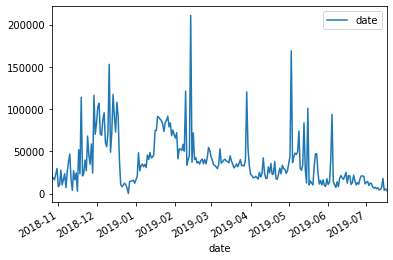

In [64]:
c.simplify_info()

In [65]:
c.after_info()

The total number of error codes after cleansing:212452
with ealierst date 0    2019-07-17
Name: date, dtype: object and latest date 212451    2019-01-18
Name: date, dtype: object
